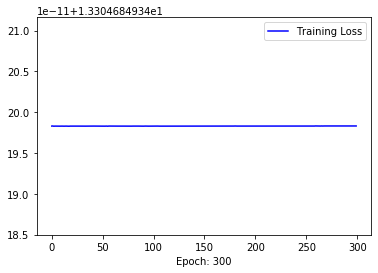

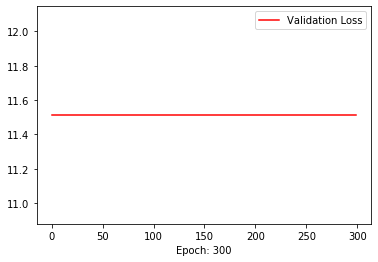

[[   0    1    0    0    2    0    0    0    0  997]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0   10    0    0   13    0    0    0    0  977]
 [   0    0    0    0    2    0    0    0    0  998]
 [   0    0    0    0    3    0    0    0    0  997]
 [   0    0    0    0    0    0    0    0    0 1000]
 [   0    0    0    0    0    0    0    0    0 1000]]
Accuracy: 10.0 %


In [2]:
#Task 1
import util_mnist_reader
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
#ROWS = 28
#COLS = 28
#CHANNELS = 1

X_train, y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')

train_samples = len(X_train)
test_samples = len(X_test)

#initialising bias
bias = np.ones((train_samples,1))
X_train = np.append(X_train, bias, 1)
X_train = np.transpose(X_train)

bias = np.ones((test_samples,1))
X_test = np.append(X_test, bias, 1)
X_test = np.transpose(X_test)


nb_classes = 10
#One Hot encoding on X_train
targets = np.array(y_train).reshape(-1)
y_train_new = np.eye(nb_classes)[targets]

#One Hot encoding on X_test
targets1 = np.array(y_test).reshape(-1)
y_test_new = np.eye(nb_classes)[targets1]

nodes = 90
input_nodes = len(X_train)

#Initializng weights
W1 = np.zeros((nodes,input_nodes))
W2 = np.zeros((nodes, 10))

losstrack = []
losstrack1 = []


def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

def softmax(x):
    exps=np.exp(x)
    return exps/np.sum(exps,axis=0)

#calculating cost for backward propagation
def compute_cost(a2, y_train_new):
    m = len(y_train_new)
    logprobs = np.multiply(np.log(a2),y_train_new)
    cost = -1/m*np.sum(np.sum(logprobs)) 
    return cost


epochs = 100
learning_rate = 0.5

for epoch in range(epochs):
    
    #Forward Propagation
    z1 = np.dot(W1, X_train)
    a1 = sigmoid(z1)      
    z1_t = np.dot(W1,X_test)
    a1_t = sigmoid(z1_t) 
    
    z2 = np.dot(W2.T, a1)
    a2 = np.transpose(softmax(z2))
    z2_t = np.dot(W2.T, a1_t)
    a2_t = np.transpose(softmax(z2_t))
    
    loss=compute_cost(a2, y_train_new)
    loss1=compute_cost(a2_t, y_test_new)
    losstrack.append(np.squeeze(loss))
    losstrack1.append(np.squeeze(loss1))
    
    #Backpropagating for calculating dw1,dz1,dw2,dz2
    dw2 = (1/train_samples)*np.dot(a1, (a2-y_train_new))
    dz2= a2-y_train_new
    da1 = np.transpose(np.dot(dz2,W2.T))
    dz1 = np.multiply(da1, np.multiply(a1, (1-a1)))
    dw1 = (1/train_samples)*np.dot(dz1, np.transpose(X_train))
    
    #Updating weights
    W1 = W1 - dw1 * learning_rate
    W2 = W2 - dw2 * learning_rate
    
fig = plt.figure()

plt.plot(losstrack,'b',label='Training Loss')
#plt.plot(losstrack_validate,'b',label='Validation Loss')
plt.xlabel('Epoch: '+str(epochs))
plt.legend()
plt.show()
fig.savefig('Fig7.png')
fig = plt.figure()
plt.plot(losstrack1,'r',label='Validation Loss')
plt.xlabel('Epoch: '+str(epochs))
plt.legend()
plt.show()
fig.savefig('Fig8.png')

predicted_values = np.argmax(a2_t, axis=1)
conf_mat=confusion_matrix(y_test,predicted_values)
print(conf_mat)
testacc = accuracy_score(y_test, predicted_values)*100
#testprec = precision_score(y_test, predicted_values, average='micro')*100
#testrecall = recall_score(y_test, predicted_values, average='micro')*100
print("Accuracy: " + str(testacc) + " %")
#print("Precision: " + str(testprec) + " %")
#print("Recall: " + str(testrecall) + " %")



Using TensorFlow backend.
c:\users\win\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 40199 samples, validate on 19801 samples
Epoch 1/20
40199/40199 [==============================] - 17s 425us/step - loss: 0.5061 - accuracy: 0.8171 - val_loss: 0.4168 - val_accuracy: 0.8489
Epoch 2/20
40199/40199 [==============================] - 8s 204us/step - loss: 0.3762 - accuracy: 0.8632 - val_loss: 0.3726 - val_accuracy: 0.8681
Epoch 3/20
40199/40199 [==============================] - 8s 207us/step - loss: 0.3363 - accuracy: 0.8751 - val_loss: 0.3722 - val_accuracy: 0.8663
Epoch 4/20
40199/40199 [==============================] - 8s 190us/step - loss: 0.3098 - accuracy: 0.8843 - val_loss: 0.3439 - val_accuracy: 0.8758
Epoch 5/20
40199/40199 [==============================] - 7s 186us/step - loss: 0.2871 - accuracy: 0.8945 - val_loss: 0.3349 - val_accuracy: 0.8828
Epoch 6/20
40199/40199 [==============================] - 7s 185us/step - loss: 0.2699 - accuracy: 0.8994 - val_loss: 0.3597 - val_accuracy: 0.8787
Epoch 7/20
40199/40199 [==============================] - 7s 

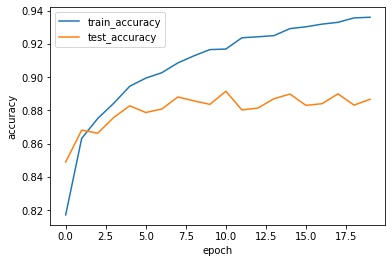

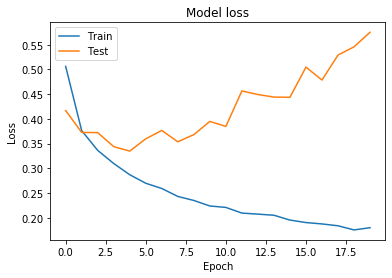

10000/10000 [==============================] - 0s 44us/step
[[805   0  29  14   1   0 147   0   4   0]
 [  2 969   2  21   2   0   4   0   0   0]
 [ 13   0 816   6  81   0  82   0   2   0]
 [ 33   2  13 877  31   0  40   0   4   0]
 [  0   1  90  30 794   0  83   0   2   0]
 [  0   0   2   0   0 931   0  45   4  18]
 [111   0  79  23  60   0 721   0   6   0]
 [  0   0   0   0   0   7   0 958   0  35]
 [  5   0   5   4   5   1  16   5 959   0]
 [  2   0   0   0   0   7   1  31   1 958]]
87.88


In [3]:
#Task 2
from keras.models import Model
from keras.layers import Dense, Input, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
import keras
import util_mnist_reader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X_train, y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')
# simple model


def simple_model(X_train, y_train):
    inputs = Input(shape=(784,))
    x = BatchNormalization()(inputs)
    x = Dense(128, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(input=inputs, output=predictions)
    model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])
    history = model.fit(X_train, to_categorical(y_train), epochs=20, shuffle=True, validation_split=0.33)
    return history

simple_history = simple_model(X_train, y_train)
def show_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
show_history(simple_history)
#predictions=simple_model.predict(X_test)

simple_history.model.evaluate(X_test, to_categorical(y_test))
predict=simple_history.model.predict(X_test)
confmat=confusion_matrix(y_test, predict.argmax(axis=1))
print(confmat)
acc_f=accuracy_score(y_test,predict.argmax(axis=1))*100
print(acc_f)

c:\users\win\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 144s 4ms/step - loss: 0.6460 - accuracy: 0.7688 - val_loss: 0.5109 - val_accuracy: 0.8507
Epoch 2/10
40199/40199 [==============================] - 162s 4ms/step - loss: 0.4720 - accuracy: 0.8326 - val_loss: 0.4376 - val_accuracy: 0.8677
Epoch 3/10
40199/40199 [==============================] - 178s 4ms/step - loss: 0.4378 - accuracy: 0.8449 - val_loss: 0.4204 - val_accuracy: 0.8688
Epoch 4/10
40199/40199 [==============================] - 140s 3ms/step - loss: 0.4258 - accuracy: 0.8491 - val_loss: 0.4451 - val_accuracy: 0.8745
Epoch 5/10
40199/40199 [==============================] - 136s 3ms/step - loss: 0.4210 - accuracy: 0.8501 - val_loss: 0.5437 - val_accuracy: 0.8751
Epoch 6/10
40199/40199 [==============================] - 157s 4ms/step - loss: 0.4118 - accuracy: 0.8545 - val_loss: 0.3835 - val_accuracy: 0.8759
Epoch 7/10
40199/40199 [==============================] - 187s

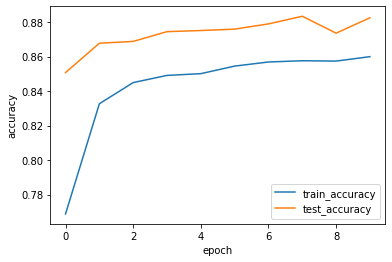

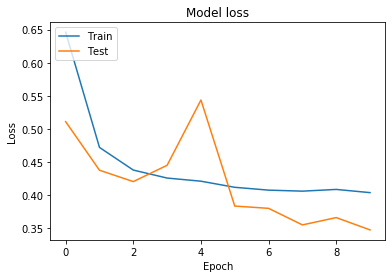

10000/10000 [==============================] - 5s 534us/step
[[870   1  16  14   8   1  78   3   9   0]
 [  2 968   0  24   3   0   3   0   0   0]
 [ 16   1 778  10 129   0  64   0   2   0]
 [ 34  11  13 879  36   0  26   0   1   0]
 [  1   1  53  28 864   0  53   0   0   0]
 [  1   0   0   0   0 931   0  60   0   8]
 [169   2  86  21 108   0 601   1  12   0]
 [  0   0   0   0   0   8   0 975   0  17]
 [  4   0   7   7   4   2   6   6 964   0]
 [  0   0   0   0   0   5   1  60   0 934]]
87.64


In [4]:
#Task3_final
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Reshape
from keras.models import Model
from keras.layers import Dense, Input, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
import keras
import util_mnist_reader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


X_train, y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')

def conv_model(X_train, y_train):
    inputs = Input(shape=(784,))
    x = BatchNormalization()(inputs)
    x = Dropout(0.2)(x)
    x = Reshape((28, 28, 1))(x)
    x = Conv2D(32, (3,3), activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Conv2D(32, (3,3), activation='relu')(x)
    x = Dropout(0.5)(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(input=inputs, output=predictions)
    model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])
    history = model.fit(X_train, to_categorical(y_train), epochs=10, shuffle=True, validation_split=0.33)
    return history

conv_history = conv_model(X_train, y_train)
def show_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
show_history(conv_history)
conv_history.model.evaluate(X_test, to_categorical(y_test))
predict1=conv_history.model.predict(X_test)
confmat1=confusion_matrix(y_test, predict1.argmax(axis=1))
print(confmat1)
acc_f1=accuracy_score(y_test,predict1.argmax(axis=1))*100
print(acc_f1)